In [ ]:
import numpy as np #array processing
import pandas as pd #data processing

#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Neural Network
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

#Metrics
from sklearn.metrics import accuracy_score

In [ ]:
stroke_data = pd.read_csv("/content/healthcare-dataset-stroke-data.csv")
stroke_data.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
stroke_data.tail() # show data from end

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [ ]:
type(stroke_data)

pandas.core.frame.DataFrame

In [ ]:
stroke_data.ndim


2

In [ ]:
stroke_data.shape

(5110, 12)

In [ ]:
stroke_data.dtypes #dtypes = data types

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [ ]:
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
stroke_data.describe()


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
stroke_data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [ ]:
stroke_data.stroke.nunique() #total no: different value

2

In [ ]:
stroke_data.stroke.unique() #different values

array([1, 0])

In [ ]:
stroke_data.stroke.value_counts().rename('count'), #counts no: occurence of different values
stroke_data.stroke.value_counts(True).mul(100).rename("%") #counts % of occurence of different values
                    #True gives percentage in value_counts.

0    95.127202
1     4.872798
Name: %, dtype: float64

In [ ]:
stroke_data["stroke"].value_counts() ##counts no: occurence of different values

0    4861
1     249
Name: stroke, dtype: int64

In [ ]:
stroke_data.stroke.sample(20) #randomly picks 20 records from stroke feature

2520    0
4757    0
574     0
49      1
448     0
1070    0
1455    0
3549    0
963     0
2364    0
5004    0
4125    0
2443    0
1434    0
4076    0
384     0
334     0
4282    0
2487    0
4594    0
Name: stroke, dtype: int64

Text(0.5, 1.0, 'Number of Patients')

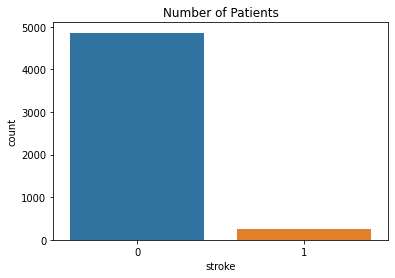

In [ ]:
sns.countplot(data = stroke_data, x = 'stroke') #no: of occurences in graphical form
plt.title('Number of Patients')

Text(0.5, 1.0, 'Number of Genders')

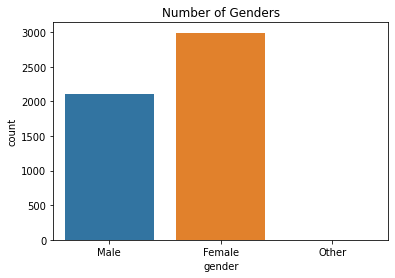

In [ ]:
sns.countplot(data = stroke_data,x = 'gender')
plt.title('Number of Genders')

In [ ]:
stroke_data.isnull()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,False,False,False,False,False,False,False,False,False,True,False,False
5106,False,False,False,False,False,False,False,False,False,False,False,False
5107,False,False,False,False,False,False,False,False,False,False,False,False
5108,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
stroke_data.isnull().any()

id                   False
gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                   True
smoking_status       False
stroke               False
dtype: bool

In [ ]:
print('Missing data sum: ')
stroke_data.isnull().sum()

Missing data sum: 


id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
print('Missing Data Percentage:')
(stroke_data.isnull().sum()/stroke_data.count()).mul(100)

Missing Data Percentage:


id                   0.00000
gender               0.00000
age                  0.00000
hypertension         0.00000
heart_disease        0.00000
ever_married         0.00000
work_type            0.00000
Residence_type       0.00000
avg_glucose_level    0.00000
bmi                  4.09452
smoking_status       0.00000
stroke               0.00000
dtype: float64

In [ ]:
categorical_features = [feature for feature in stroke_data.columns if stroke_data[feature].dtype == 'O']
print('categorical features:',categorical_features)


categorical features: ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


In [ ]:
numerical_features = [feature for feature in stroke_data.columns if stroke_data[feature].dtype != 'object']
numerical_features


['id',
 'age',
 'hypertension',
 'heart_disease',
 'avg_glucose_level',
 'bmi',
 'stroke']

In [ ]:
cd = pd.DataFrame(categorical_features)
cd.head()


,0
0,gender
1,ever_married
2,work_type
3,Residence_type
4,smoking_status


In [ ]:
stroke_data.gender.duplicated().sum()

5107

In [ ]:
stroke_data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5105    False
5106    False
5107    False
5108    False
5109    False
Length: 5110, dtype: bool

In [ ]:
stroke_data.ever_married.unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
stroke_data.work_type.unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [ ]:
stroke_data.smoking_status.unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [ ]:
stroke_data.Residence_type.unique()

array(['Urban', 'Rural'], dtype=object)

In [ ]:
stroke_data.bmi.nunique()

418

In [ ]:
stroke_data.avg_glucose_level.nunique()

3979

[Text(0.5, 1.0, 'Correlation Matrix')]

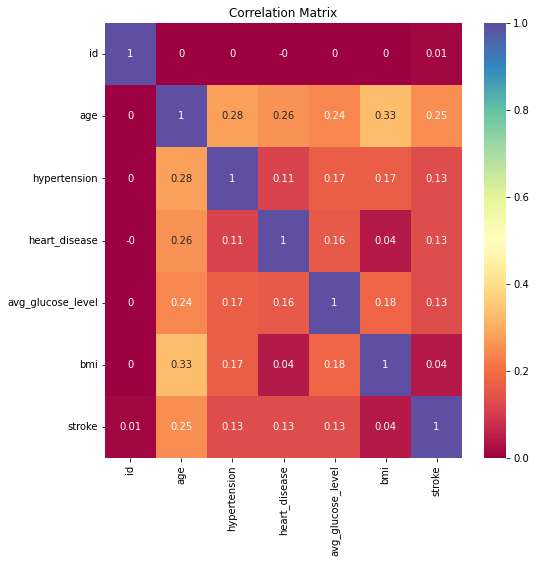

In [ ]:
corr = stroke_data.corr().round(2)
plt.figure(figsize=(8,8))
sns.heatmap(data = corr, annot =True, cmap='Spectral').set(title='Correlation Matrix') #Annot = gives numbers over colors, cmap = group/list of colors

In [ ]:
corr
# 95-100 outstanding corr
# 50-99 strong +ve corr
# 20-50 medium +ve corr
# 0-20 weak +ve corr
# same for -ve

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.00,0.00,0.00,-0.00,0.00,0.00,0.01
age,0.00,1.00,0.28,0.26,0.24,0.33,0.25
hypertension,0.00,0.28,1.00,0.11,0.17,0.17,0.13
heart_disease,-0.00,0.26,0.11,1.00,0.16,0.04,0.13
avg_glucose_level,0.00,0.24,0.17,0.16,1.00,0.18,0.13
bmi,0.00,0.33,0.17,0.04,0.18,1.00,0.04
stroke,0.01,0.25,0.13,0.13,0.13,0.04,1.00


<Axes: >

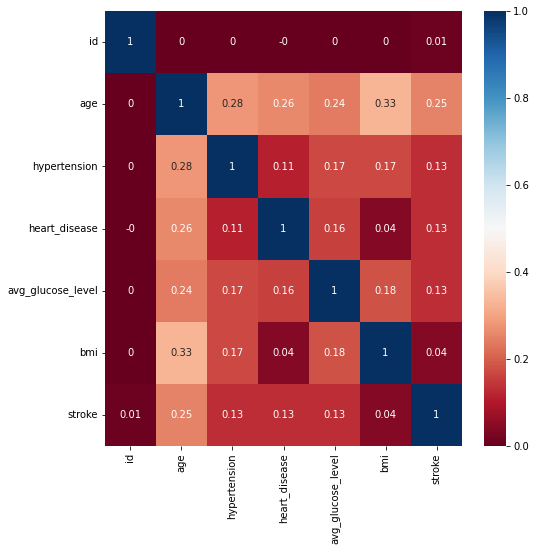

In [ ]:
plt.figure(figsize = (8,8))
sns.heatmap(data=corr, annot = True,cmap = 'RdBu',fmt = 'g')

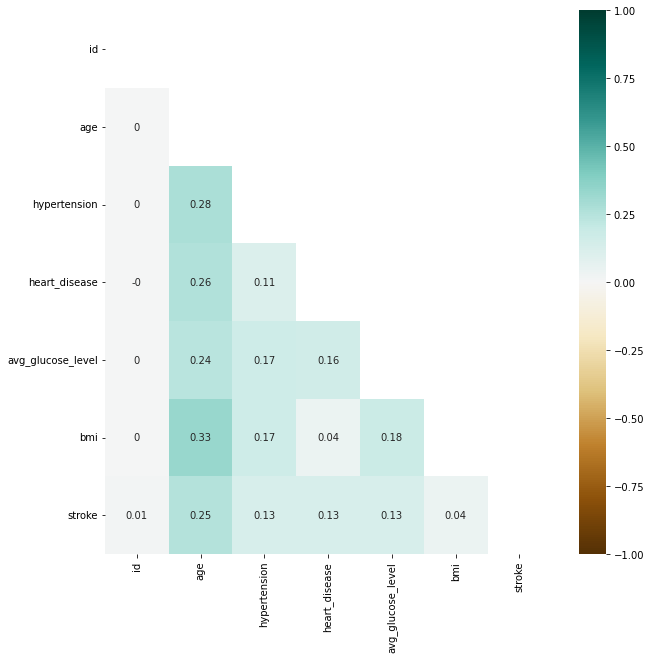

In [ ]:
mask = np.triu(np.ones_like(corr,dtype = bool))
plt.figure(figsize = (10,10))
sns.heatmap(corr,center = 0,vmin = -1,vmax = 1, mask = mask, annot = True, cmap = 'BrBG')
plt.show()

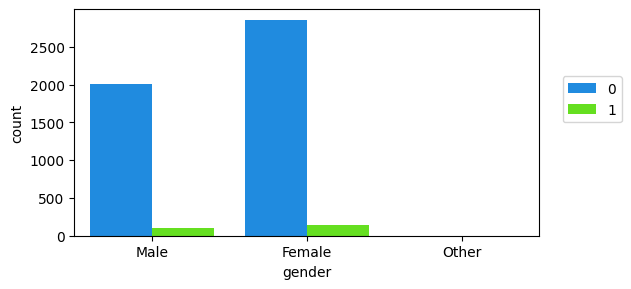

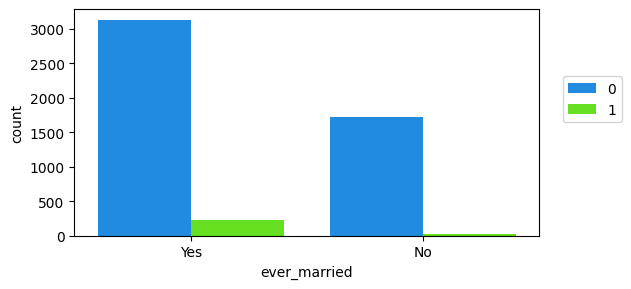

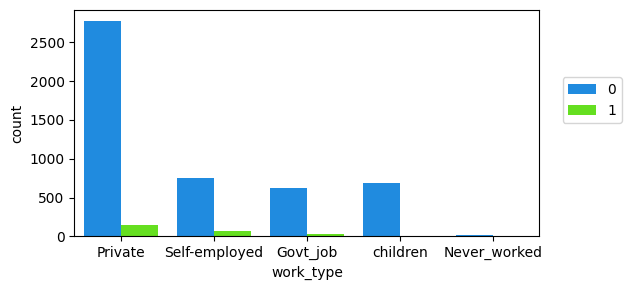

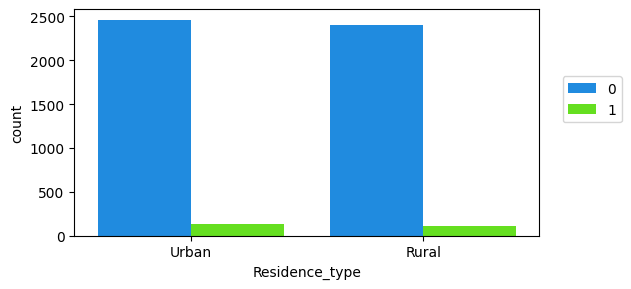

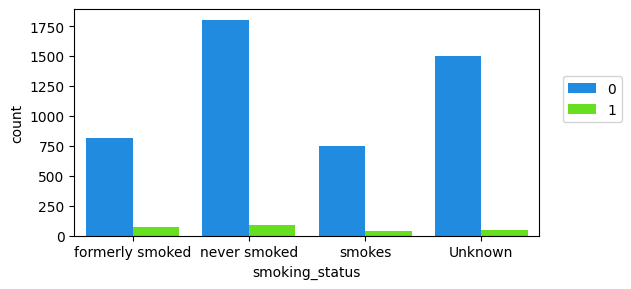

In [ ]:
# Onwards dataset is divided into categorical and numerical features

# Visualizing categorical features

for col in categorical_features:
    plt.figure(figsize= (6,3), dpi = 100)#dot per inch = dpi
    sns.countplot(data = stroke_data,x=col,hue = 'stroke',palette = 'gist_rainbow_r') #x = col means values of that column 
    plt.legend(loc=(1.05,0.5))

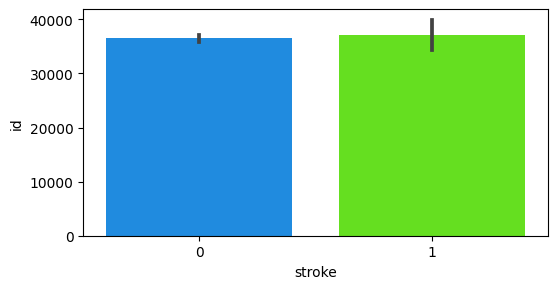

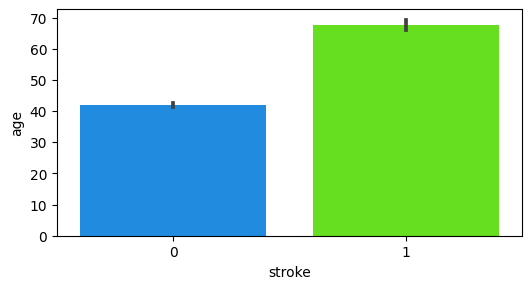

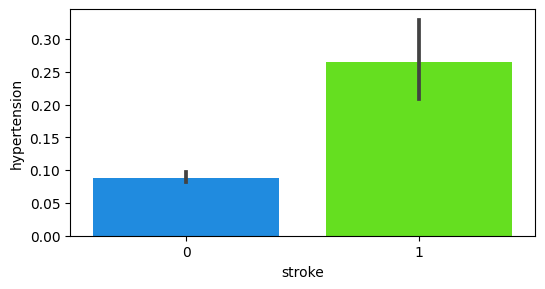

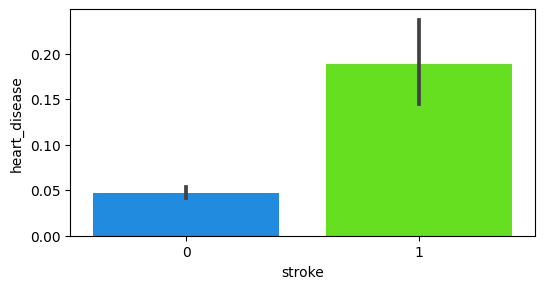

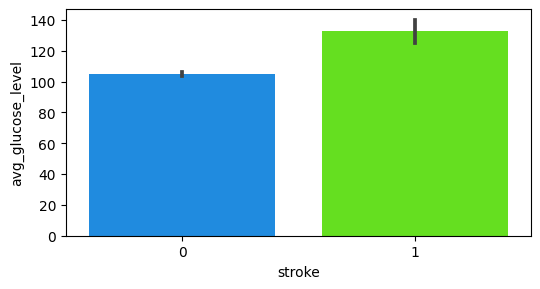

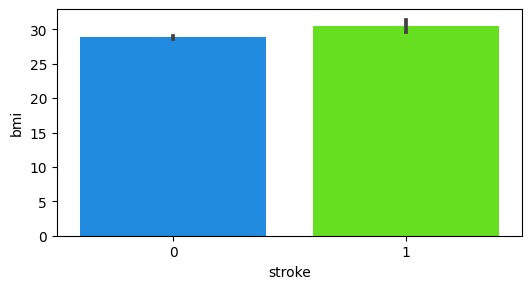

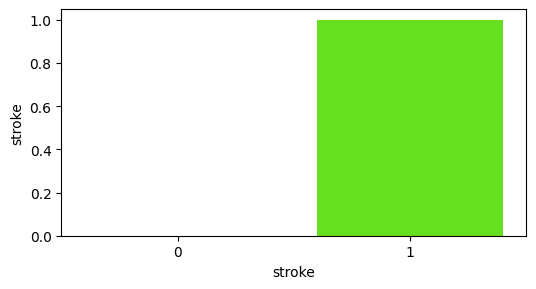

In [ ]:
# Visualizing numerical data

for col in numerical_features:
    plt.figure(figsize = (6,3),dpi = 100)
    sns.barplot(data = stroke_data, x = 'stroke', y = col,palette = 'gist_rainbow_r')

In [ ]:
# Handling missing value

stroke_data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
stroke_data['bmi']= stroke_data['bmi'].fillna(stroke_data.bmi.mean())

In [ ]:
stroke_data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
# dropping irrelevant features

train = stroke_data.drop(['id'],axis = 1)
train


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [ ]:
train.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [ ]:
train.shape

(5110, 11)

In [ ]:
train_data_cat = train.select_dtypes('object')
train_data_num = train.select_dtypes('number')
train_data_num

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,67.0,0,1,228.69,36.600000,1
1,61.0,0,0,202.21,28.893237,1
2,80.0,0,1,105.92,32.500000,1
3,49.0,0,0,171.23,34.400000,1
4,79.0,1,0,174.12,24.000000,1
...,...,...,...,...,...,...
5105,80.0,1,0,83.75,28.893237,0
5106,81.0,0,0,125.20,40.000000,0
5107,35.0,0,0,82.99,30.600000,0
5108,51.0,0,0,166.29,25.600000,0


In [ ]:
train_data_cat

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Female,Yes,Self-employed,Rural,never smoked
2,Male,Yes,Private,Rural,never smoked
3,Female,Yes,Private,Urban,smokes
4,Female,Yes,Self-employed,Rural,never smoked
...,...,...,...,...,...
5105,Female,Yes,Private,Urban,never smoked
5106,Female,Yes,Self-employed,Urban,never smoked
5107,Female,Yes,Self-employed,Rural,never smoked
5108,Male,Yes,Private,Rural,formerly smoked


In [ ]:
# categorical to numerical

train_data_cata_encoded = pd.get_dummies(train_data_cat,columns = train_data_cat.columns.to_list())
train_data_cata_encoded

,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0
1,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0
2,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0
3,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1
4,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0
5106,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0
5107,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0
5108,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0


In [ ]:
data = pd.concat([train_data_cata_encoded,train_data_num],axis = 1, join = 'outer')
data.head()

,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,...,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,0,1,0,0,1,0,0,1,0,0,...,0,1,0,0,67.0,0,1,228.69,36.600000,1
1,1,0,0,0,1,0,0,0,1,0,...,0,0,1,0,61.0,0,0,202.21,28.893237,1
2,0,1,0,0,1,0,0,1,0,0,...,0,0,1,0,80.0,0,1,105.92,32.500000,1
3,1,0,0,0,1,0,0,1,0,0,...,0,0,0,1,49.0,0,0,171.23,34.400000,1
4,1,0,0,0,1,0,0,0,1,0,...,0,0,1,0,79.0,1,0,174.12,24.000000,1


In [ ]:
# seperating dependant and independant features

y = data['stroke']
x = data.drop('stroke',axis = 1)

In [ ]:
from sklearn.preprocessing import StandardScaler 
sc =StandardScaler()
x = sc.fit_transform(x)
x

array([[-1.18950991e+00,  1.18998977e+00, -1.39904618e-02, ...,
         4.18503199e+00,  2.70637544e+00,  1.00123401e+00],
       [ 8.40682358e-01, -8.40343359e-01, -1.39904618e-02, ...,
        -2.38946800e-01,  2.12155854e+00,  4.61555355e-16],
       [-1.18950991e+00,  1.18998977e+00, -1.39904618e-02, ...,
         4.18503199e+00, -5.02830130e-03,  4.68577254e-01],
       ...,
       [ 8.40682358e-01, -8.40343359e-01, -1.39904618e-02, ...,
        -2.38946800e-01, -5.11442636e-01,  2.21736316e-01],
       [-1.18950991e+00,  1.18998977e+00, -1.39904618e-02, ...,
        -2.38946800e-01,  1.32825706e+00, -4.27845098e-01],
       [ 8.40682358e-01, -8.40343359e-01, -1.39904618e-02, ...,
        -2.38946800e-01, -4.60867458e-01, -3.49895329e-01]])

In [ ]:
# Importing ML toolkits
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.svm import SVC
import pickle

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
# from xgboost import XGBClassifier,plot_importance
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold,learning_curve

In [ ]:
# Splitting 
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 7)
X_train.shape,X_test.shape

((3577, 21), (1533, 21))

In [ ]:
accuracy = {}

In [ ]:
# LogisticRegression
lr = LogisticRegression(max_iter = 200)
lr.fit(X_train,y_train)
y_pred1 = lr.predict(X_test)
print(accuracy_score(y_test,y_pred1))
accuracy[str(lr)] = accuracy_score(y_test,y_pred1)*100

0.9471624266144814


<Axes: >

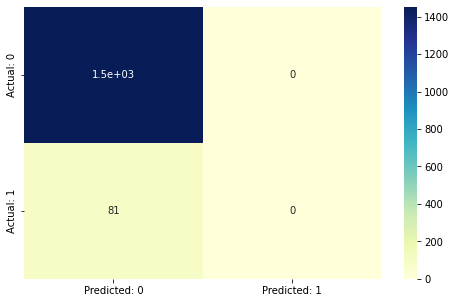

In [ ]:
# Confusion Matrix
# ...............................
cm = confusion_matrix(y_test,y_pred1)

conf_matrix = pd.DataFrame(data =cm, columns = ['Predicted: 0','Predicted: 1'],index = ['Actual: 0', 'Actual: 1'])
plt.figure(figsize= (8,5))
sns.heatmap(conf_matrix, annot = True,cmap = 'YlGnBu')

In [ ]:
# Classification Report 
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1452
           1       0.00      0.00      0.00        81

    accuracy                           0.95      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.90      0.95      0.92      1533



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
y_pred_test = lr.predict(X_test)
test = pd.DataFrame({'Actual': y_test,'Y_test predicted':y_pred_test})

In [ ]:
test.sample(10)

,Actual,Y_test predicted
868,0,0
1257,0,0
1175,0,0
1527,0,0
4455,0,0
4366,0,0
2284,0,0
3309,0,0
3490,0,0
1032,0,0


In [ ]:
dtc = DecisionTreeClassifier(max_depth = 3)
dtc.fit(X_train,y_train)
y_pred2 = dtc.predict(X_test)
print(accuracy_score(y_test,y_pred2))
accuracy[str(dtc)] = accuracy_score(y_test,y_pred2)*100

0.9465101108936725


<Axes: >

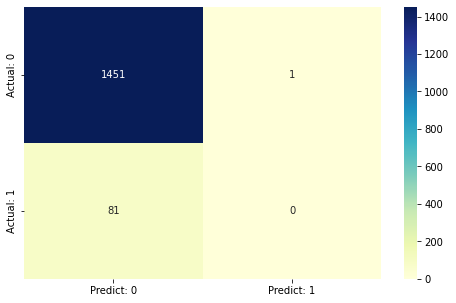

In [ ]:
cm = confusion_matrix(y_test,y_pred2)
conf_matrix = pd.DataFrame(data = cm, columns = ['Predict: 0','Predict: 1'],index = ['Actual: 0','Actual: 1' ])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'YlGnBu')

In [ ]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1452
           1       0.00      0.00      0.00        81

    accuracy                           0.95      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.90      0.95      0.92      1533



In [ ]:
y_pred_test = dtc.predict(X_test)
test = pd.DataFrame({'Actual':y_test,'y_test predicted':y_pred_test})
test.sample(10)

,Actual,y_test predicted
183,1,0
4700,0,0
2469,0,0
4006,0,0
514,0,0
1282,0,0
5050,0,0
1990,0,0
661,0,0
75,1,0


In [ ]:
rfc = RandomForestClassifier(max_depth = 5)
rfc.fit(X_train,y_train)
y_pred3 = rfc.predict(X_test)
print(accuracy_score(y_test,y_pred3))
accuracy[str(rfc)] = accuracy_score(y_test,y_pred3)*100

0.9471624266144814


<Axes: >

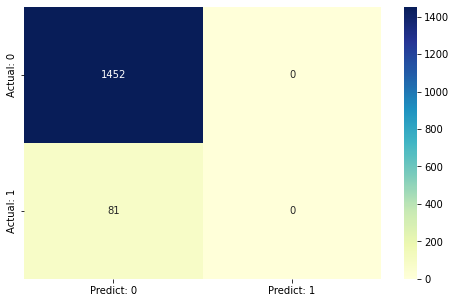

In [ ]:
cm = confusion_matrix(y_test,y_pred3)
conf_matrix = pd.DataFrame(data = cm, columns = ['Predict: 0','Predict: 1'],index = ['Actual: 0','Actual: 1' ])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'YlGnBu')

In [ ]:
gbc = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1 )
gbc.fit(X_train,y_train)
y_pred4 = gbc.predict(X_test)
print(accuracy_score(y_test,y_pred4))
accuracy[str(gbc)] = accuracy_score(y_test,y_pred4)*100

0.9425962165688193


<Axes: >

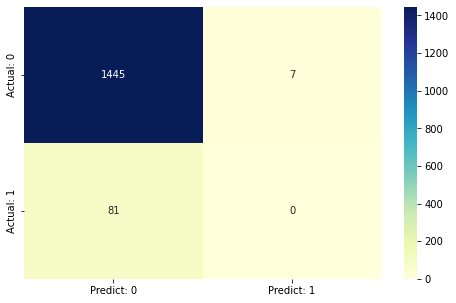

In [ ]:
cm = confusion_matrix(y_test,y_pred4)
conf_matrix = pd.DataFrame(data = cm, columns = ['Predict: 0','Predict: 1'],index = ['Actual: 0','Actual: 1' ])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'YlGnBu')

In [ ]:
svc = SVC()
svc.fit(X_train,y_train)
y_pred5 = svc.predict(X_test)
print(accuracy_score(y_test,y_pred5))
accuracy[str(svc)] = accuracy_score(y_test,y_pred5)*100

0.9471624266144814


<Axes: >

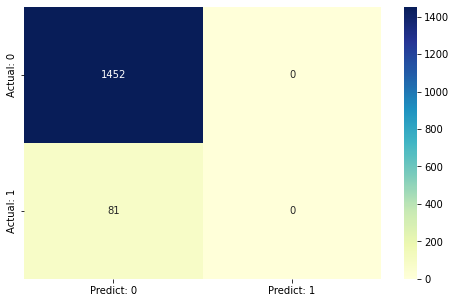

In [ ]:
cm = confusion_matrix(y_test,y_pred5)
conf_matrix = pd.DataFrame(data = cm, columns = ['Predict: 0','Predict: 1'],index = ['Actual: 0','Actual: 1' ])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'YlGnBu')

In [ ]:
accuracy

{'LogisticRegression(max_iter=200)': 94.71624266144813,
 'DecisionTreeClassifier(max_depth=3)': 94.65101108936726,
 'RandomForestClassifier(max_depth=5)': 94.71624266144813,
 'GradientBoostingClassifier()': 94.25962165688193,
 'SVC()': 94.71624266144813}

# Conclusions:
- Almost all heart diseases are caused to people above age 50.
- Hypertension disease in people of above 50.
- 'BMI','Age' and 'Glucose_level' are important features.
- Only 249 of the total dataset records have stroke.

In [ ]:
# conda install -c conda-forge imbalanced-learn

In [ ]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x1,y1 = smote.fit_resample(x,y)

In [ ]:
x1.shape

(9722, 21)

In [ ]:
X_train,X_test, y_train, y_test = train_test_split(x1,y1,test_size = 0.3, shuffle = 'True',random_state = 3)

In [ ]:
print(X_train.shape,X_test.shape)

(6805, 21) (2917, 21)


In [ ]:
lr = LogisticRegression(max_iter = 200)
lr.fit(X_train,y_train)
y_pred1 = lr.predict(X_test)
print(accuracy_score(y_test,y_pred1))
accuracy[str(lr)] = accuracy_score(y_test,y_pred1)*100

0.7929379499485774


<Axes: >

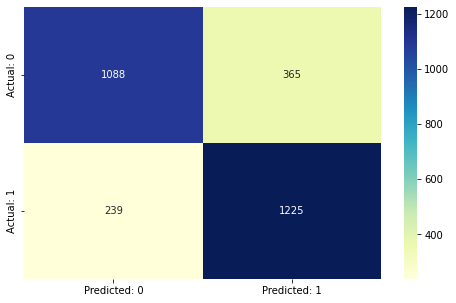

In [ ]:
cm =confusion_matrix(y_test,y_pred1)
conf_matrix = pd.DataFrame(data = cm, columns = ['Predicted: 0','Predicted: 1'],index = ['Actual: 0', 'Actual: 1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix,annot = True,fmt = 'd', cmap = "YlGnBu")

In [ ]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.82      0.75      0.78      1453
           1       0.77      0.84      0.80      1464

    accuracy                           0.79      2917
   macro avg       0.80      0.79      0.79      2917
weighted avg       0.80      0.79      0.79      2917



In [ ]:
 y_pred_test = lr.predict(X_test)

test = pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y_pred_test
})
test.head()

,Actual,Y test predicted
6893,1,1
940,0,0
5285,1,1
1839,0,1
9293,1,0


In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train,y_train)
y_pred2 = knn.predict(X_test)
print(accuracy_score(y_test,y_pred2))
accuracy[str(knn)] = accuracy_score(y_test,y_pred2)*100

0.9088104216660953


<Axes: >

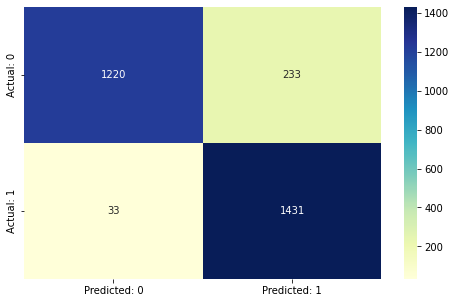

In [ ]:
cm =confusion_matrix(y_test,y_pred2)
conf_matrix = pd.DataFrame(data = cm, columns = ['Predicted: 0','Predicted: 1'],index = ['Actual: 0', 'Actual: 1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix,annot = True,fmt = 'd', cmap = "YlGnBu")

In [ ]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.97      0.84      0.90      1453
           1       0.86      0.98      0.91      1464

    accuracy                           0.91      2917
   macro avg       0.92      0.91      0.91      2917
weighted avg       0.92      0.91      0.91      2917



In [ ]:
 y_pred_test = knn.predict(X_test)

test = pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y_pred_test
})
test.head(10)

,Actual,Y test predicted
6893,1,1
940,0,0
5285,1,1
1839,0,1
9293,1,1
2262,0,1
955,0,0
146,1,0
6834,1,1
1757,0,0


In [ ]:
#  DeepLearning
import tensorflow as tf
from tensorflow import keras


In [ ]:
model = keras.Sequential([
    keras.layers.Dense(4800,input_shape = [21], activation = 'relu'),
    keras.layers.Dense(2000, activation='relu'),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
    ])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4800)              105600    
                                                                 
 dense_1 (Dense)             (None, 2000)              9602000   
                                                                 
 dense_2 (Dense)             (None, 1000)              2001000   
                                                                 
 dense_3 (Dense)             (None, 100)               100100    
                                                                 
 dense_4 (Dense)             (None, 1)                 101       
                                                                 
Total params: 11,808,801
Trainable params: 11,808,801
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
train = model.fit(X_train,y_train, epochs =50, batch_size = 100)

Epoch 1/50
69/69 [==============================] - 32s 459ms/step - loss: 0.1777 - accuracy: 0.9274
Epoch 2/50
69/69 [==============================] - 30s 441ms/step - loss: 0.1807 - accuracy: 0.9327
Epoch 3/50
69/69 [==============================] - 38s 547ms/step - loss: 0.1595 - accuracy: 0.9368
Epoch 4/50
69/69 [==============================] - 28s 406ms/step - loss: 0.1592 - accuracy: 0.9399
Epoch 5/50
69/69 [==============================] - 22s 326ms/step - loss: 0.1462 - accuracy: 0.9452
Epoch 6/50
69/69 [==============================] - 22s 315ms/step - loss: 0.1436 - accuracy: 0.9471
Epoch 7/50
69/69 [==============================] - 23s 324ms/step - loss: 0.1482 - accuracy: 0.9424
Epoch 8/50
69/69 [==============================] - 23s 329ms/step - loss: 0.1309 - accuracy: 0.9502
Epoch 9/50
69/69 [==============================] - 24s 355ms/step - loss: 0.1135 - accuracy: 0.9584
Epoch 10/50
69/69 [==============================] - 30s 431ms/step - loss: 0.1265 - accura

In [ ]:
model.evaluate(X_test,y_test)

92/92 [==============================] - 3s 27ms/step - loss: 0.2594 - accuracy: 0.9410


[0.2594465911388397, 0.9410353302955627]

In [ ]:
y_pred = model.predict(X_test).flatten()
y_pred = np.round(y_pred)

y_pred[:11]
y_test[:11]

print(classification_report(y_test,y_pred))

92/92 [==============================] - 3s 26ms/step
              precision    recall  f1-score   support

           0       0.97      0.91      0.94      1453
           1       0.92      0.97      0.94      1464

    accuracy                           0.94      2917
   macro avg       0.94      0.94      0.94      2917
weighted avg       0.94      0.94      0.94      2917



<Axes: >

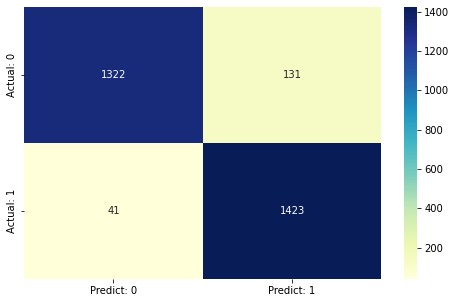

In [ ]:
cm = confusion_matrix(y_test,y_pred)
conf_matrix = pd.DataFrame(data = cm, columns = ['Predict: 0','Predict: 1'],index = ['Actual: 0','Actual: 1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix,annot = True,fmt ='d',cmap = 'YlGnBu')

In [ ]:
model = Sequential()
model.add(Dense(512,activation='relu', input_shape= (21,)))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 512)               11264     
                                                                 
 dense_10 (Dense)            (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_11 (Dense)            (None, 256)               131328    
                                                                 
 dense_12 (Dense)            (None, 256)               65792     
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_13 (Dense)            (None, 128)              

In [ ]:
model.compile(loss = 'binary_crossentropy',optimizer = Adam(lr = 0.001),metrics = ['accuracy'])

In [ ]:
from keras.callbacks import EarlyStopping
cb = EarlyStopping(
    monitor = 'accuracy',
    min_delta = 0.001,
    patience = 100,
    mode ='auto'
)

In [ ]:
model.fit(X_train,y_train,epochs = 50,batch_size = 100,validation_split = 0.2,callbacks = cb)

Epoch 1/50
55/55 [==============================] - 2s 34ms/step - loss: 0.1735 - accuracy: 0.9331 - val_loss: 0.1819 - val_accuracy: 0.9295
Epoch 2/50
55/55 [==============================] - 2s 36ms/step - loss: 0.1601 - accuracy: 0.9342 - val_loss: 0.1920 - val_accuracy: 0.9280
Epoch 3/50
55/55 [==============================] - 1s 26ms/step - loss: 0.1508 - accuracy: 0.9368 - val_loss: 0.1817 - val_accuracy: 0.9258
Epoch 4/50
55/55 [==============================] - 2s 31ms/step - loss: 0.1595 - accuracy: 0.9372 - val_loss: 0.1731 - val_accuracy: 0.9361
Epoch 5/50
55/55 [==============================] - 1s 21ms/step - loss: 0.1505 - accuracy: 0.9392 - val_loss: 0.1915 - val_accuracy: 0.9258
Epoch 6/50
55/55 [==============================] - 1s 19ms/step - loss: 0.1547 - accuracy: 0.9394 - val_loss: 0.1905 - val_accuracy: 0.9251
Epoch 7/50
55/55 [==============================] - 1s 19ms/step - loss: 0.1494 - accuracy: 0.9432 - val_loss: 0.1813 - val_accuracy: 0.9287
Epoch 8/50
55

In [ ]:
model.evaluate(X_test,y_test)

92/92 [==============================] - 1s 7ms/step - loss: 0.2826 - accuracy: 0.9335


[0.2826496660709381, 0.9334933161735535]

In [ ]:
y_pred = model.predict(X_test)
y_pred = np.round(y_pred)
print(classification_report(y_test,y_pred))

92/92 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.98      0.88      0.93      1453
           1       0.89      0.98      0.94      1464

    accuracy                           0.93      2917
   macro avg       0.94      0.93      0.93      2917
weighted avg       0.94      0.93      0.93      2917



<Axes: >

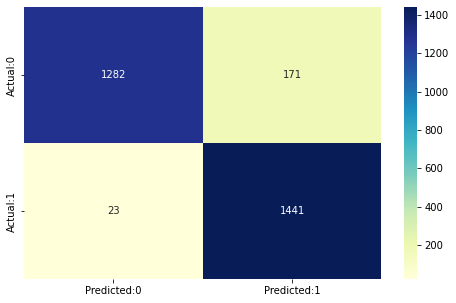

In [ ]:
cm=confusion_matrix(y_test, y_pred)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

#THE END